# MEMBACA DATA

In [ ]:
import numpy as np
from numpy import array
import pandas as pd
import gensim

import gzip
from urllib.request import urlopen

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation, Dropout,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.layers import SimpleRNN
from keras.layers import Flatten

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#menyambungkan file ke google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/TA/pelabelan.csv")
df

,review_clean,rating,label
0,update sertifikat hilang kemarin update,5,Positif
1,vaksin kali alhamdulillah sehat terima kasih p...,5,Positif
2,atur tanggal nya bikin kesel,1,Negatif
3,pakai nomor nik vaksin tidak kalo tanggal vaks...,4,Positif
4,ngikut atas,5,Positif
...,...,...,...
49867,tolong kalo bikin sertifikat vaksin tanggal la...,5,Positif
49868,bingung aplikasi vaksin sertifikat beda vaksin...,2,Negatif
49869,aplikasi bagus sayang scan barcodenya radius s...,3,Netral
49870,vaksin masuk data ngga sertifikat nya,1,Negatif


In [ ]:
df.drop('label', axis=1, inplace=True)

In [ ]:
df['rating'].value_counts()

1    24992
5    12673
2     4900
3     4273
4     3034
Name: rating, dtype: int64

In [ ]:
df

,review_clean,rating
0,update sertifikat hilang kemarin update,5
1,vaksin kali alhamdulillah sehat terima kasih p...,5
2,atur tanggal nya bikin kesel,1
3,pakai nomor nik vaksin tidak kalo tanggal vaks...,4
4,ngikut atas,5
...,...,...
49867,tolong kalo bikin sertifikat vaksin tanggal la...,5
49868,bingung aplikasi vaksin sertifikat beda vaksin...,2
49869,aplikasi bagus sayang scan barcodenya radius s...,3
49870,vaksin masuk data ngga sertifikat nya,1


# MENGUBAH VARIABEL KATEGORI MENJADI NUMERIK

In [ ]:
def label(df):
    df['label']='-'
    df.loc[df['rating']<=2,'label']='negatif'
    df.loc[df['rating']==3,'label']='netral'
    df.loc[df['rating']>=4,'label']='positif'
    
    df = pd.get_dummies(df,columns=['label']).reset_index(drop=True).drop(columns=['rating'])
    return df

In [ ]:
df = label(df)

In [ ]:
df

,review_clean,label_negatif,label_netral,label_positif
0,update sertifikat hilang kemarin update,0,0,1
1,vaksin kali alhamdulillah sehat terima kasih p...,0,0,1
2,atur tanggal nya bikin kesel,1,0,0
3,pakai nomor nik vaksin tidak kalo tanggal vaks...,0,0,1
4,ngikut atas,0,0,1
...,...,...,...,...
49867,tolong kalo bikin sertifikat vaksin tanggal la...,0,0,1
49868,bingung aplikasi vaksin sertifikat beda vaksin...,1,0,0
49869,aplikasi bagus sayang scan barcodenya radius s...,0,1,0
49870,vaksin masuk data ngga sertifikat nya,1,0,0


# MENYIMPAN HASIL PELABELAN BARU

In [ ]:
df.to_csv("/content/drive/My Drive/TA/pelabelan_new.csv", index=False)

In [ ]:
df.to_excel("/content/drive/My Drive/TA/pelabelan_new.xlsx", index=False)

# VISUALISASI TOTAL PELABELAN

In [ ]:
import plotly.express as px

In [ ]:
total = pd.DataFrame(df[df.columns[1:]].sum()).rename(columns={0:'Total'})

In [ ]:
fig = px.pie(total,values='Total',names=total.index)
fig.show()

# WORDCLOUD

In [ ]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

In [ ]:
pos_comments = list(df[df['label_positif']==1]['review_clean'].values)
positif_words = ' '.join(pos_comments).split(' ')
positif_words = pd.DataFrame(positif_words,columns=['words'])['words'].value_counts()[1:]

net_comments = list(df[df['label_netral']==1]['review_clean'].values)
netral_words = ' '.join(net_comments).split(' ')
netral_words = pd.DataFrame(netral_words,columns=['words'])['words'].value_counts()[1:]

neg_comments = list(df[df['label_negatif']==1]['review_clean'].values)
negatif_words = ' '.join(neg_comments).split(' ')
negatif_words = pd.DataFrame(negatif_words,columns=['words'])['words'].value_counts()[1:]

In [ ]:
positif_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                      colormap='Blues', background_color='white', max_words=50)
positif_wc = positif_wc.generate_from_frequencies(positif_words)


netral_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                          colormap='Greys', background_color='white', max_words=50)
netral_wc = netral_wc.generate_from_frequencies(netral_words)


negatif_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                          colormap='Reds_r', background_color='white', max_words=50)
negatif_wc = negatif_wc.generate_from_frequencies(negatif_words)

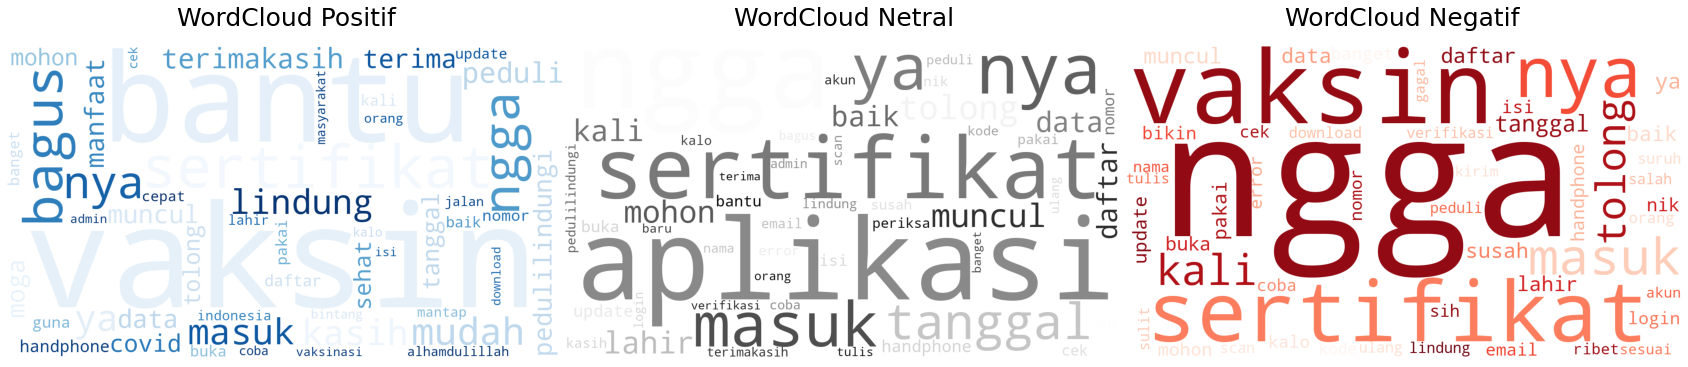

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(30, 30))

axs[0].set_title('WordCloud Positif', size=25, pad=20)
axs[0].imshow(positif_wc)
axs[0].axis('off')

axs[1].set_title('WordCloud Netral', size=25, pad=20)
axs[1].imshow(netral_wc)
axs[1].axis('off')

axs[2].set_title('WordCloud Negatif', size=25, pad=20)
axs[2].imshow(negatif_wc)
axs[2].axis('off');

fig.subplots_adjust(hspace=1,wspace=0.0)

# N-GRAM PLOT

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
def ngram_results(df):
    
    df_1=df[df['label_positif']==1]
    df_2=df[df['label_netral']==1]
    df_3=df[df['label_negatif']==1]
    
    
    def uni_bi_tri(df_pos,df_net,df_neg):
        
        #pos
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
       
        #neu
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_net['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_net=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_net['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_net=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_net['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_net=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_net['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_net=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        #neg
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        results=[result_mono_pos,result_bi_pos,result_tri_pos,result_tetra_pos,
                 result_mono_net,result_bi_net,result_tri_net,result_tetra_net,
                 result_mono_neg,result_bi_neg,result_tri_neg,result_tetra_neg]
        
        return results
    

    
    return uni_bi_tri(df_1,df_2,df_3)

In [ ]:
pedulind_results = ngram_results(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
def rename_index(dflist):

    #pos
    df_mono_pos=pd.DataFrame(dflist[0]).reset_index().rename(columns={'index':'Mono_Pos'})
    df_bi_pos=pd.DataFrame(dflist[1]).reset_index().rename(columns={'index':'Bi_Pos'})
    df_tri_pos=pd.DataFrame(dflist[2]).reset_index().rename(columns={'index':'Tri_Pos'})
    df_tetra_pos=pd.DataFrame(dflist[3]).reset_index().rename(columns={'index':'Tetra_Pos'})
    #neu
    df_mono_net=pd.DataFrame(dflist[4]).reset_index().rename(columns={'index':'Mono_Net'})
    df_bi_net=pd.DataFrame(dflist[5]).reset_index().rename(columns={'index':'Bi_Net'})
    df_tri_net=pd.DataFrame(dflist[6]).reset_index().rename(columns={'index':'Tri_Net'})
    df_tetra_net=pd.DataFrame(dflist[7]).reset_index().rename(columns={'index':'Tetra_Net'})
    #neg
    df_mono_neg=pd.DataFrame(dflist[8]).reset_index().rename(columns={'index':'Mono_Pos'})
    df_bi_neg=pd.DataFrame(dflist[9]).reset_index().rename(columns={'index':'Bi_Pos'})
    df_tri_neg=pd.DataFrame(dflist[10]).reset_index().rename(columns={'index':'Tri_Pos'})
    df_tetra_neg=pd.DataFrame(dflist[11]).reset_index().rename(columns={'index':'Tetra_Neg'})
    
    result=[df_mono_pos, df_bi_pos, df_tri_pos, df_tetra_pos,
            df_mono_net, df_bi_net, df_tri_net, df_tetra_net,
            df_mono_neg, df_bi_neg, df_tri_neg, df_tetra_neg]
    
    return result

In [ ]:
pedulind_results = rename_index(pedulind_results)

In [ ]:
#for df in pedulind_results:
fig = make_subplots(rows=3, cols=4,
                    vertical_spacing=0.15,
                    column_titles =['Mono-grams','Bi-grams','Tri-grams','Tetra-grams'],
                    row_titles =['Positif','Netral','Negatif'],                  
      
                   )
#for df in amazon_results:
fig.add_trace(go.Bar(
            x = pedulind_results[0][pedulind_results[0].columns[0]].head(),
            y = pedulind_results[0][pedulind_results[0].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=1)
fig.add_trace(go.Bar(
            x = pedulind_results[1][pedulind_results[1].columns[0]].head(),
            y = pedulind_results[1][pedulind_results[1].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=2)
fig.add_trace(go.Bar(
            x = pedulind_results[2][pedulind_results[2].columns[0]].head(),
            y = pedulind_results[2][pedulind_results[2].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=3)
    # neu
fig.add_trace(go.Bar(
            x = pedulind_results[3][pedulind_results[3].columns[0]].head(),
            y = pedulind_results[3][pedulind_results[3].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=4)
fig.add_trace(go.Bar(
            x = pedulind_results[4][pedulind_results[4].columns[0]].head(),
            y = pedulind_results[4][pedulind_results[4].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=1)
fig.add_trace(go.Bar(
            x = pedulind_results[5][pedulind_results[5].columns[0]].head(),
            y = pedulind_results[5][pedulind_results[5].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=2)
    # neg
fig.add_trace(go.Bar(
            x = pedulind_results[6][pedulind_results[6].columns[0]].head(),
            y = pedulind_results[6][pedulind_results[6].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=3)
fig.add_trace(go.Bar(
            x = pedulind_results[7][pedulind_results[7].columns[0]].head(),
            y = pedulind_results[7][pedulind_results[7].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=4)
fig.add_trace(go.Bar(
            x = pedulind_results[8][pedulind_results[8].columns[0]].head(),
            y = pedulind_results[8][pedulind_results[8].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=1)
fig.add_trace(go.Bar(
            x = pedulind_results[9][pedulind_results[9].columns[0]].head(),
            y = pedulind_results[9][pedulind_results[9].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=2)
fig.add_trace(go.Bar(
            x = pedulind_results[10][pedulind_results[10].columns[0]].head(),
            y = pedulind_results[10][pedulind_results[10].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=3)
fig.add_trace(go.Bar(
            x = pedulind_results[11][pedulind_results[11].columns[0]].head(),
            y = pedulind_results[11][pedulind_results[11].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=4)


    
#
fig.update_layout({"showlegend": False},height=900, width=1000)
fig.show()

# SPLIT DATA

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y =  df[df.columns[1:]].values

In [ ]:
X = []

sentences = list(df["review_clean"])
for sen in sentences:
    X.append(sen)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# PARAMETER

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Defining the num of words
tokenizer = Tokenizer(num_words=5000)
# Fighting in the X df
tokenizer.fit_on_texts(X)

# Tokenizing Train and test

X_prep = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

# Setting the max length of features

maxlen = 200

# Ensuring the all sequences have the same length
X_train = pad_sequences(X_prep, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# EMBEDDING

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

In [ ]:
embeddings_dictionary = dict()

fasttext_file= gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz'))

for line in fasttext_file:
    records = line.split()
    word = records[0].decode('utf-8')
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
fasttext_file.close()

embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# BALANCING DATA

In [ ]:
print('Negatif',pd.DataFrame(y_train).sum()[0])
print('Netral',pd.DataFrame(y_train).sum()[1])
print('Positif',pd.DataFrame(y_train).sum()[2])

Negatif 19518
Netral 2760
Positif 10138


In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
over = RandomOverSampler()
    
X_ov, y_ov = over.fit_resample(X_train, y_train)

In [ ]:
print('Negatif',pd.DataFrame(y_ov).sum()[0])
print('Netral',pd.DataFrame(y_ov).sum()[1])
print('Positif',pd.DataFrame(y_ov).sum()[2])

Negatif 19518
Netral 19518
Positif 19518


# MENCEGAH OVERFITTING

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

In [ ]:
selected_features = [] 
for label in range(0,3):
    selector = SelectKBest(f_classif, k='all')
    selector.fit(X_ov, pd.DataFrame(y_ov)[label])
    selected_features.append(list(selector.scores_))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [ 88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [ 88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 1

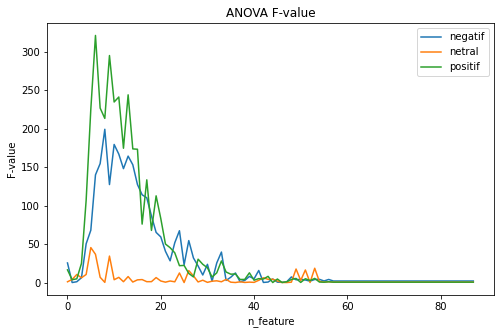

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(selected_features[0])
plt.plot(selected_features[1])
plt.plot(selected_features[2])

plt.title('ANOVA F-value')
plt.ylabel('F-value')
plt.xlabel('n_feature')
plt.legend(['negatif','netral','positif'], loc='upper right')


plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(pd.DataFrame(selected_features).T[:20][0])
plt.plot(pd.DataFrame(selected_features).T[:20][1])
plt.plot(pd.DataFrame(selected_features).T[:20][2])

plt.title('ANOVA F-value')
plt.ylabel('F-value')
plt.xlabel('n_feature')
plt.legend(['negatif','netral','positif'], loc='upper right')

plt.show()

In [ ]:
X_ov=X_ov[:,:20]

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding

# PEMODELAN

## LSTM + FASTTEXT

In [ ]:
deep_inputs = Input(shape=(20,))
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(3, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(X_ov, y_ov, batch_size=32, epochs=15, verbose=1, validation_split=0.3)

Epoch 1/15
1281/1281 [==============================] - 67s 47ms/step - loss: 0.4938 - accuracy: 0.6228 - val_loss: 0.5607 - val_accuracy: 0.5856
Epoch 2/15
1281/1281 [==============================] - 61s 47ms/step - loss: 0.4677 - accuracy: 0.6456 - val_loss: 0.5861 - val_accuracy: 0.4791
Epoch 3/15
1281/1281 [==============================] - 60s 47ms/step - loss: 0.4579 - accuracy: 0.6566 - val_loss: 0.6273 - val_accuracy: 0.4637
Epoch 4/15
1281/1281 [==============================] - 61s 47ms/step - loss: 0.4472 - accuracy: 0.6684 - val_loss: 0.5547 - val_accuracy: 0.5374
Epoch 5/15
1281/1281 [==============================] - 61s 48ms/step - loss: 0.4355 - accuracy: 0.6802 - val_loss: 0.4735 - val_accuracy: 0.6724
Epoch 6/15
1281/1281 [==============================] - 60s 47ms/step - loss: 0.4222 - accuracy: 0.6933 - val_loss: 0.5341 - val_accuracy: 0.5687
Epoch 7/15
1281/1281 [==============================] - 60s 47ms/step - loss: 0.4064 - accuracy: 0.7122 - val_loss: 0.4810 -

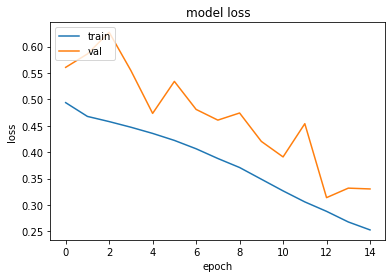

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')

plt.show()

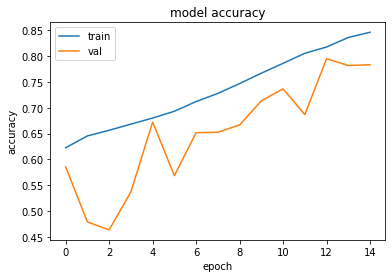

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [ ]:
score_train = model.evaluate(X_ov[:,:20], y_ov, verbose=1)
score_test = model.evaluate(X_test[:,:20], y_test, verbose=1)

546/546 [==============================] - 9s 16ms/step - loss: 0.4725 - accuracy: 0.7351


In [ ]:
score = pd.DataFrame({'Loss':[score_train[0],score_test[0]],
             'Accuracy':[score_train[1],score_test[1]]},
             index=['Train Score','Test Score'])

score

,Loss,Accuracy
Train Score,0.258612,0.839072
Test Score,0.472533,0.735105


## SIMPLE RNN + FASTTEXT

In [ ]:
deep_inputs = Input(shape=(20,))
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(deep_inputs)
SimpleRNN_Layer_1 = SimpleRNN(128)(embedding_layer)
dense_layer_1 = Dense(3, activation='sigmoid')(SimpleRNN_Layer_1)
model1 = Model(inputs=deep_inputs, outputs=dense_layer_1)

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history1 = model1.fit(X_ov, y_ov, batch_size=32, epochs=15, verbose=1, validation_split=0.3)

Epoch 1/15
1281/1281 [==============================] - 49s 36ms/step - loss: 0.5039 - accuracy: 0.6181 - val_loss: 0.5574 - val_accuracy: 0.5297
Epoch 2/15
1281/1281 [==============================] - 18s 14ms/step - loss: 0.4722 - accuracy: 0.6443 - val_loss: 0.6816 - val_accuracy: 0.3918
Epoch 3/15
1281/1281 [==============================] - 18s 14ms/step - loss: 0.4525 - accuracy: 0.6700 - val_loss: 0.6023 - val_accuracy: 0.4728
Epoch 4/15
1281/1281 [==============================] - 18s 14ms/step - loss: 0.4329 - accuracy: 0.6909 - val_loss: 0.5008 - val_accuracy: 0.6005
Epoch 5/15
1281/1281 [==============================] - 19s 15ms/step - loss: 0.4191 - accuracy: 0.7066 - val_loss: 0.5545 - val_accuracy: 0.5767
Epoch 6/15
1281/1281 [==============================] - 18s 14ms/step - loss: 0.4023 - accuracy: 0.7229 - val_loss: 0.4665 - val_accuracy: 0.6592
Epoch 7/15
1281/1281 [==============================] - 18s 14ms/step - loss: 0.3810 - accuracy: 0.7472 - val_loss: 0.4270 -

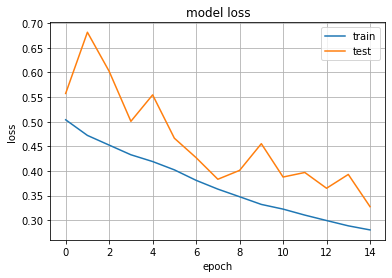

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])  
plt.plot(history1.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.grid()  
plt.legend(['train', 'test'])  
plt.show()

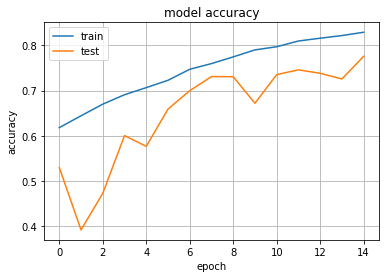

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])  
plt.plot(history1.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.grid()  
plt.legend(['train', 'test'])  
plt.show()

In [ ]:
score_train = model1.evaluate(X_ov[:,:20], y_ov, verbose=1)
score_test = model1.evaluate(X_test[:,:20], y_test, verbose=1)

546/546 [==============================] - 4s 6ms/step - loss: 0.4503 - accuracy: 0.7291


In [ ]:
score1 = pd.DataFrame({'Loss':[score_train[0],score_test[0]],
             'Accuracy':[score_train[1],score_test[1]]},
             index=['Train Score','Test Score'])

score1

,Loss,Accuracy
Train Score,0.282498,0.824009
Test Score,0.450296,0.729148
